In [7]:
import matplotlib.pyplot as plt                                                                                                                                                               
import numpy as np
import json
import os
print(os.getcwd())
ABS = '/home/tim/Data/cloud/uni/work/BA/thesis/graphs_maker/'


/home/tim/Data/cloud/uni/work/BA/thesis/graphs_maker/i6_experiments/users/schupp/hybrid_hmm_nn/plot_makers


In [8]:
ex = "baseline_07_big_short"
sub_ex = "baseline_07_big_short+num-blocks-XXX-aux-at-half"

experiments = []
_set = "dev-other"

blocks = list(range(10, 16+1))

for x in range(10, 16+1):
    if x == 12:
        experiments.append(f'{ex}/{ex}')
    else:
        experiments.append(f'{ex}/{sub_ex.replace("XXX", str(x))}')

paths = []

for ex in experiments:
    paths.append(f'{ABS}/results2/{ex}.json')

datas = []

for p in paths:

    with open(p) as data_file:
        data = json.load(data_file)

    datas.append(data)


[40.0, 80.0, 100.0, 119.0, 120.0]
[10.06, 8.57, 8.3, 8.19, 8.01]
[40.0, 80.0, 100.0, 119.0, 120.0]
[9.98, 8.43, 8.2, 8.04, 7.96]
[40.0, 80.0, 100.0, 119.0, 120.0]
[9.88, 8.47, 8.29, 7.98, 7.87]
[40.0, 80.0, 100.0, 119.0, 120.0]
[9.92, 8.34, 8.16, 8.01, 7.86]
[40.0, 80.0, 100.0, 119.0, 120.0]
[9.93, 8.31, 8.07, 7.94, 7.76]
[40.0, 80.0, 100.0, 119.0, 120.0]
[9.95, 8.31, 8.06, 7.88, 7.72]
[40.0, 80.0, 100.0, 119.0, 120.0]
[9.94, 8.21, 7.99, 7.76, 7.66]


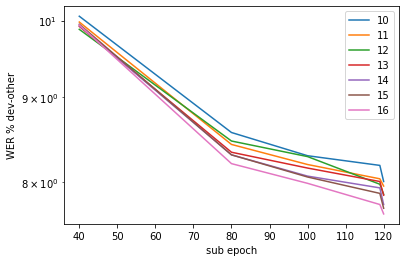

In [42]:
def x_y_for_ex(i):
    X = list(datas[i][_set]["optim_wer_by_ep"].keys())
    Y = [
    float(datas[i][_set]["optim_wer_by_ep"][x][-2][:-1]) for x in X
    ]
    X = [float(x) for x in X]
    return X, Y

plt.xlabel("sub epoch")
plt.ylabel("WER % dev-other")

for i, d in enumerate(datas):
    X, Y = x_y_for_ex(i)
    print(X)
    print(Y)
    plt.plot(X, Y, label=blocks[i])

plt.legend(loc="upper right")

plt.yscale('log')

plt.savefig(f"{ABS}/WERconvergence-num-blocks.pdf")


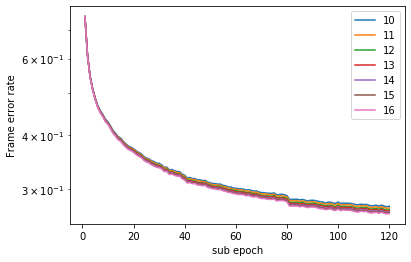

In [40]:
def x_y_for_ex(i, metric='dev_error_output'):
    X = list(datas[i][_set]["errors_per_ep"].keys())
    rm_from_x = []
    Y = []
    for x in X:
        if str(x) in datas[i][_set]["errors_per_ep"] and metric in datas[i][_set]["errors_per_ep"][str(x)]:
            Y.append(float(datas[i][_set]["errors_per_ep"][str(x)][metric]))
        else:
            rm_from_x.append(x)
            
    X = [x for x in X if not x in rm_from_x]
    X = [float(x) for x in X]
    return X, Y


plt.xlabel("sub epoch")
plt.ylabel("Frame error rate")

for i, d in enumerate(datas):
    X, Y = x_y_for_ex(i, 'train_error_output')
    #print(X)
    #print(Y)
    plt.plot(X, Y, label=blocks[i])

plt.legend(loc="upper right")
plt.yscale('log')

plt.savefig(f"{ABS}/error_convergence-num-blocks.pdf")
